Saving 9. Customer Segmentation in E-commerce.csv to 9. Customer Segmentation in E-commerce.csv

Shape of dataset: (541909, 8)

Columns:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Using the following numeric columns for clustering:
Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


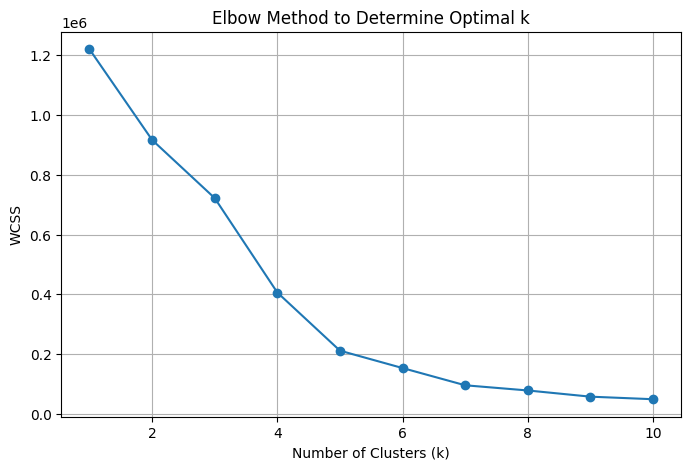

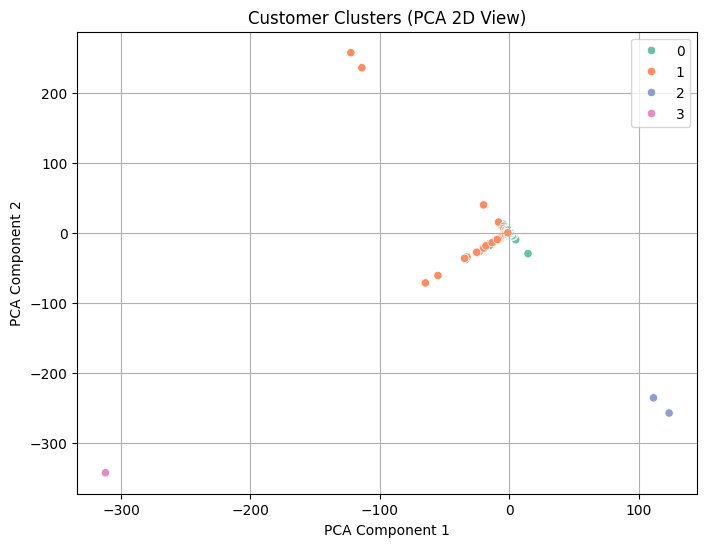


✅ Full segmented dataset saved as 'Customer_Segmentation_Output.csv'


In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Upload the file
from google.colab import files
uploaded = files.upload()

# Step 3: Read the uploaded dataset
filename = "9. Customer Segmentation in E-commerce.csv"
df = pd.read_csv(filename)

# Step 4: Check basic dataset structure
print("\nShape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Step 5: Drop rows with missing values
df.dropna(inplace=True)

# Step 6: Select only numeric features for clustering
numeric_df = df.select_dtypes(include=[np.number])
print("\nUsing the following numeric columns for clustering:")
print(numeric_df.columns)

# Step 7: Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Step 8: Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 9: Apply KMeans clustering
k = 4  # Choose based on elbow plot
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 10: Visualize clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Clusters (PCA 2D View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.legend()
plt.show()

# Step 11: Export the full clustered dataset
df.to_csv("Customer_Segmentation_Output.csv", index=False)
print("\n✅ Full segmented dataset saved as 'Customer_Segmentation_Output.csv'")
